# Notebook 2 - 2nd Linear Regression Model

## Running Imports & Data Cleaning

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

* Importing the data and renaming columns for organization


In [2]:
dftrain = pd.read_csv("./train.csv")

In [3]:
dftrain.columns = dftrain.columns.str.replace(' ', '_')
dftrain.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


* Looking for null values

In [58]:
dftrain.dtypes
dftrain.isnull().sum()

Id              0
PID             0
MS_SubClass     0
MS_Zoning       0
Lot_Frontage    0
               ..
Misc_Val        0
Mo_Sold         0
Yr_Sold         0
Sale_Type       0
SalePrice       0
Length: 81, dtype: int64

* Investingating the data types in the data

In [6]:
dftrain.info

<bound method DataFrame.info of         Id        PID  MS_SubClass MS_Zoning  Lot_Frontage  Lot_Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Alley Lot_Shap

In [7]:
dftrain.fillna(0, inplace = True)
dftrain.head()


,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2010,WD,138500


* Revisiting Correlation

In [8]:
dftrain.corr()['SalePrice']

Id                -0.051398
PID               -0.255052
MS_SubClass       -0.087335
Lot_Frontage       0.181456
Lot_Area           0.296566
Overall_Qual       0.800207
Overall_Cond      -0.097019
Year_Built         0.571849
Year_Remod/Add     0.550370
Mas_Vnr_Area       0.503579
BsmtFin_SF_1       0.423856
BsmtFin_SF_2       0.016432
Bsmt_Unf_SF        0.190861
Total_Bsmt_SF      0.629303
1st_Flr_SF         0.618486
2nd_Flr_SF         0.248452
Low_Qual_Fin_SF   -0.041594
Gr_Liv_Area        0.697038
Bsmt_Full_Bath     0.283332
Bsmt_Half_Bath    -0.045290
Full_Bath          0.537969
Half_Bath          0.283001
Bedroom_AbvGr      0.137067
Kitchen_AbvGr     -0.125444
TotRms_AbvGrd      0.504014
Fireplaces         0.471093
Garage_Yr_Blt      0.258645
Garage_Cars        0.647781
Garage_Area        0.649897
Wood_Deck_SF       0.326490
Open_Porch_SF      0.333476
Enclosed_Porch    -0.135656
3Ssn_Porch         0.048732
Screen_Porch       0.134581
Pool_Area          0.023106
Misc_Val          -0

In [9]:
tempfeat = dftrain[['SalePrice','Overall_Qual', 'Year_Built', 'Total_Bsmt_SF','1st_Flr_SF','Gr_Liv_Area','Garage_Cars','Garage_Area']]

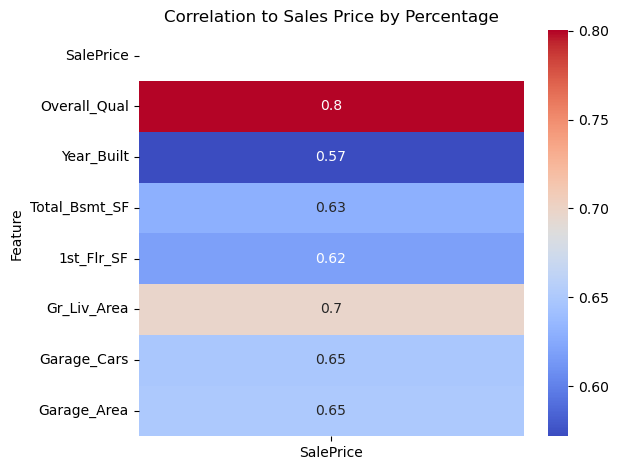

In [68]:
corr = tempfeat.corr()[['SalePrice']]
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
           cmap = 'coolwarm',
           annot = True,
           mask = mask,)

plt.title('Correlation to Sales Price by Percentage')
plt.ylabel('Feature')

plt.tight_layout()
plt.savefig('../images/correlation with sales price.jpg')

# Prepping the Model

In [13]:
X = dftrain[['Overall_Qual', 'Year_Built', 'Total_Bsmt_SF','1st_Flr_SF','Gr_Liv_Area','Garage_Cars','Garage_Area']]
y = dftrain['SalePrice']

In [14]:
X.dtypes

Overall_Qual       int64
Year_Built         int64
Total_Bsmt_SF    float64
1st_Flr_SF         int64
Gr_Liv_Area        int64
Garage_Cars      float64
Garage_Area      float64
dtype: object

In [15]:
print(X.shape)
print(y.shape)

(2051, 7)
(2051,)


### Train / Test SPlit

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [17]:
X_train.shape, y_train.shape

((1538, 7), (1538,))

In [18]:
X_test.shape, y_test.shape


((513, 7), (513,))

### Instantiating & Fitting the Model

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

### Scoring The Model

In [21]:
lr.score(X_train, y_train)

0.771226359785583

In [22]:
cross_val_score(lr, X_train, y_train).mean()

0.7536505787148194

In [25]:
print(cross_val_score(lr, X_train, y_train).mean())
print(cross_val_score(lr, X_test, y_test).mean())

0.7536505787148194
0.8342730388745225


In [42]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.771226359785583
0.8329894332273049


In [26]:
lr.predict(X_test)

array([132937.92093299, 228834.01576333, 269267.36898945, 146132.47105758,
       219299.75987184, 309584.92339653, 184442.02721777, 279930.91518921,
       165758.82973079,  97457.96825283, 136256.75424952, 222579.09270163,
       177263.60474811, 115764.06260367, 134918.27894941, 113647.0862636 ,
       125878.24594844, 213946.69255366, 327851.87407028, 232782.22661584,
       210744.64834493, 215001.54059536, 187730.52028052,  91954.85219872,
       138550.98397798, 261038.14206749, 186339.79621031, 128154.84105225,
       248302.52186332,  82150.12756858, 295578.00538224, 103582.91867252,
       130007.07062752, 200559.28899193, 218475.26420082,  83621.51269585,
       169068.72728604, 222138.26109315, 308695.40171085, 114641.15200657,
       224627.79435717, 229932.73788617, 306926.3353696 , 178731.95302649,
        88326.19497953, 179228.37733754, 115220.16928673, 104215.38018072,
       296835.01755619, 141185.50052127, 312027.52674406,  46275.1092312 ,
       128794.42528475, 2

### METRICS

In [38]:
predictions = lr.predict(X)

In [39]:
residuals = y - predictions

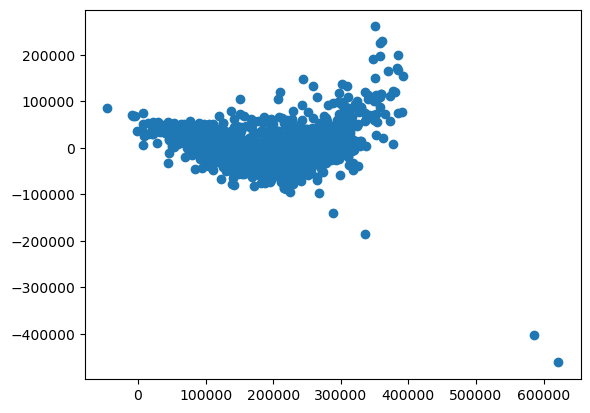

In [57]:
plt.scatter(predictions, residuals)

### Normality of errors

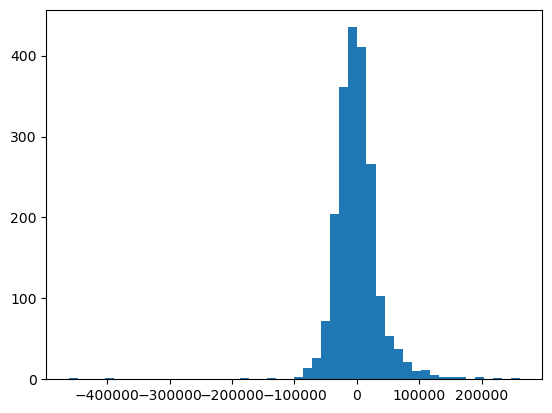

In [31]:

plt.hist(residuals, bins=50);

### Equal variance of errors

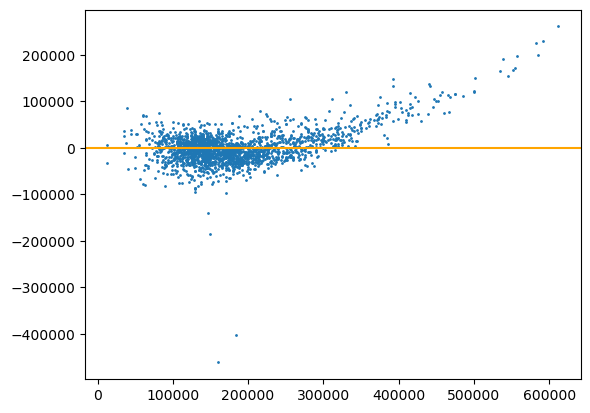

In [32]:
plt.scatter(y, residuals, s=1)
plt.axhline(0, color="orange");

### Mean Squared Error

In [59]:
from sklearn import metrics
metrics.mean_squared_error(y, predictions)

1341473519.3195395

## Kaggle Submission

In [43]:
dftest = pd.read_csv("./test.csv")

In [46]:
dftest.columns = dftest.columns.str.replace(' ', '_')
dftest.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [47]:
dftest.fillna(0, inplace = True)
dftest.head()


,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,0.0,9500,Pave,0,IR1,Lvl,...,0,185,0,0,0,0,0,7,2009,WD


In [48]:
X = dftest[['Overall_Qual', 'Year_Built', 'Total_Bsmt_SF','1st_Flr_SF','Gr_Liv_Area','Garage_Cars','Garage_Area']]

In [51]:
kagglepreds = lr.predict(X)
kagglepreds[:15]

array([167755.96383431, 209486.2445623 , 198515.38465403, 114966.48642671,
       182534.57418735,  89257.7542612 ,  98147.15820188, 141357.70159894,
       216069.09634145, 175968.43796586, 177488.19877156, 138515.41240117,
       176326.63743252, 294168.09426429, 160821.75985081])

In [52]:
dftest['SalePrice'] = kagglepreds
dftest.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,0,0,0,4,2006,WD,167755.963834
1,2718,905108090,90,RL,0.0,9662,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,8,2006,WD,209486.244562
2,2414,528218130,60,RL,58.0,17104,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,9,2006,New,198515.384654
3,1989,902207150,30,RM,60.0,8520,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,7,2007,WD,114966.486427
4,625,535105100,20,RL,0.0,9500,Pave,0,IR1,Lvl,...,185,0,0,0,0,0,7,2009,WD,182534.574187


In [54]:
submission = dftest[['Id', 'SalePrice']]
submission.head()

,Id,SalePrice
0,2658,167755.963834
1,2718,209486.244562
2,2414,198515.384654
3,1989,114966.486427
4,625,182534.574187


In [55]:
submission.to_csv('submission1.csv', index = False)